# matplotlib / seaborn 을 이용한 데이터 시각화

## 파이썬을 이용한 데이터 시각화

In [1]:
import numpy as np
import pandas as pd

%precision 3

from matplotlib import pyplot as plt

%matplotlib inline

# pyplot을 이용한 꺽은선 그래프

In [2]:
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([2,3,4,3,5,4,6,7,4,8])

Text(0, 0.5, 'y')

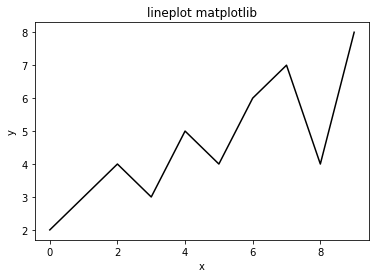

In [3]:
plt.plot(x, y, color = 'black')
plt.title("lineplot matplotlib")
plt.xlabel('x')
plt.ylabel('y')

## seaborn + pyplot 꺽은선 그래프

In [4]:
import seaborn as sns
sns.set()

Text(0, 0.5, 'y')

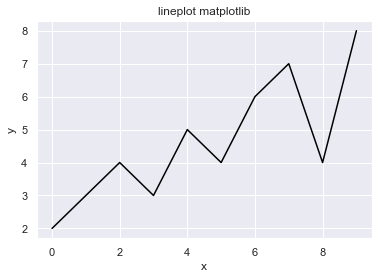

In [5]:
plt.plot(x, y, color = 'black')
plt.title("lineplot matplotlib")
plt.xlabel('x')
plt.ylabel('y')

## seaborn을 이용한 히스토그램

In [6]:
fish_data = np.array([2,3,3,4,4,4,4,5,5,6])
fish_data

array([2, 3, 3, 4, 4, 4, 4, 5, 5, 6])

<AxesSubplot:>

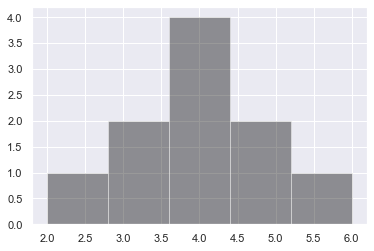

In [8]:
sns.distplot(fish_data, bins=5, color='black', kde=False) # displot 히스토그램

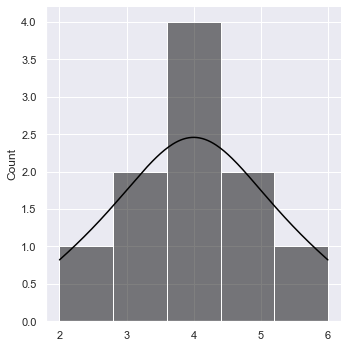

In [18]:
sns.displot(fish_data, bins=5,
           color='black',kde = True) #kde = 커널 밀도 함수

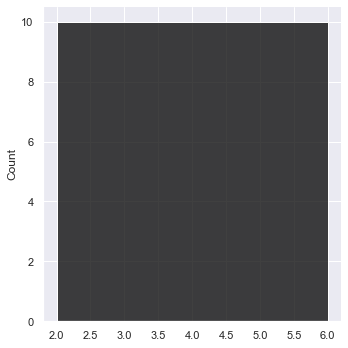

In [10]:
sns.displot(fish_data, bins=1,
           color='black',kde=False)

## 커널밀도추정에 따른 히스토그램 평활화

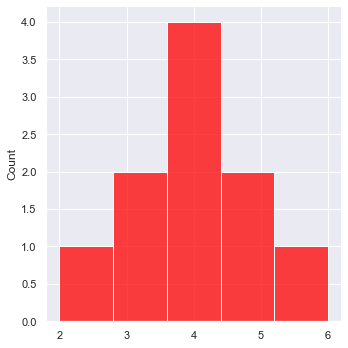

In [11]:
sns.displot(fish_data, color='red')

##  2변량 데이터에 대한 히스토그램

In [12]:
fish_multi = pd.read_csv("../data3/3-3-2-fish_multi_2.csv")
fish_multi

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4
5,A,4
6,A,4
7,A,5
8,A,5
9,A,6


In [13]:
fish_multi.groupby("species").describe()

length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0

In [15]:
length_a = fish_multi.query('species == "A"')["length"] #query 함수로 데이터 필터링 loc, iloc대신 사용
length_b = fish_multi.query('species == "B"')["length"] 

In [16]:
length_a

0    2
1    3
2    3
3    4
4    4
5    4
6    4
7    5
8    5
9    6
Name: length, dtype: int64

In [17]:
length_b

10    5
11    6
12    6
13    7
14    7
15    7
16    7
17    8
18    8
19    9
Name: length, dtype: int64

<AxesSubplot:xlabel='length'>

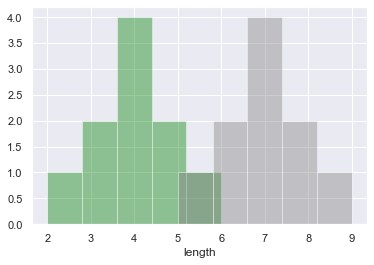

In [24]:
sns.distplot(length_a, bins = 5, 
            color = 'green', kde=False)
sns.distplot(length_b, bins = 5, 
            color='gray',kde=False)
#그래프 곂치게

## 다변량 데이터를 시각화하는 코드작성

<AxesSubplot:xlabel='species', ylabel='length'>

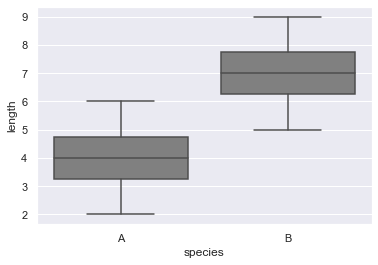

In [25]:
#상자그림
sns.boxplot(x = 'species', y='length',
           data=fish_multi, color='gray')

In [26]:
fish_multi.groupby('species').describe()

length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0

<AxesSubplot:xlabel='species', ylabel='length'>

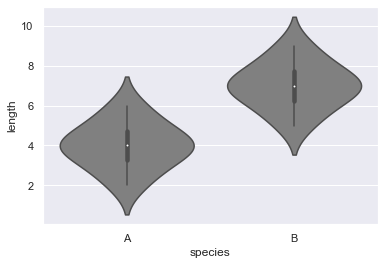

In [27]:
sns.violinplot(x='species', y='length',
              data=fish_multi, color='gray') #바이올린플롯

<AxesSubplot:xlabel='species', ylabel='length'>

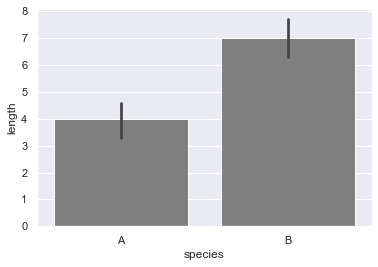

In [28]:
sns.barplot(x = 'species', y='length',
           data=fish_multi,color='gray') # 막대그래프

In [31]:
cov_data = pd.read_csv('../data3/3-2-3-cov.csv')
cov_data

,x,y
0,18.5,34
1,18.7,39
2,19.1,41
3,19.7,38
4,21.5,45
5,21.7,41
6,21.8,52
7,22.0,44
8,23.4,44
9,23.8,49


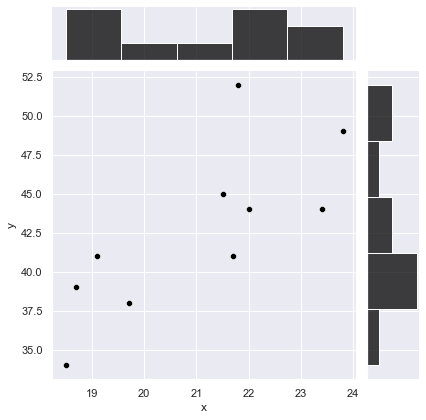

In [32]:
sns.jointplot(x='x', y='y',
             data = cov_data, color='black') #joinplot 히스토그램, 산점도

In [33]:
#seaborn에 내장되어 있는 붓꽃데이터 사용하기
iris = sns.load_dataset('iris')
iris.head(n = 3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [34]:
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


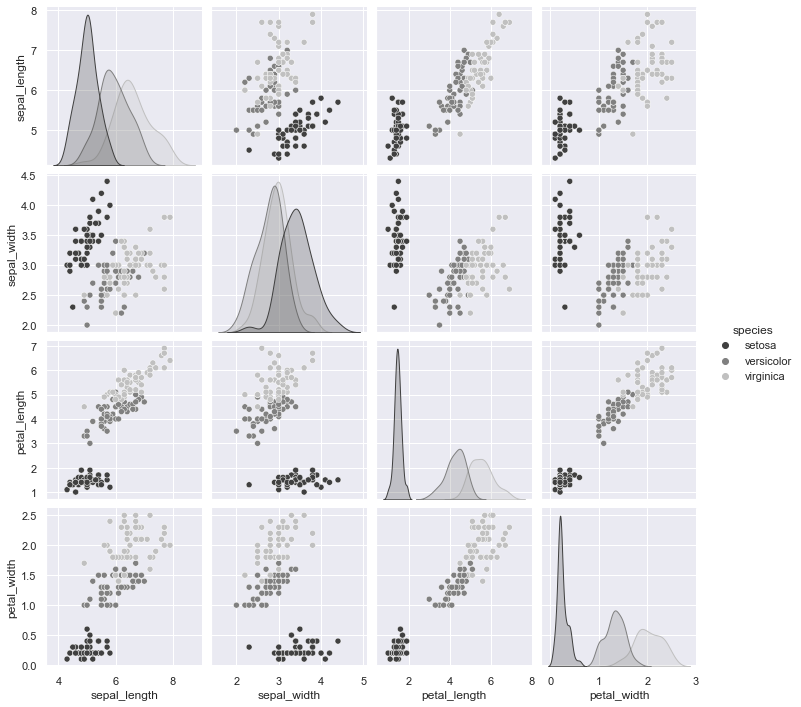

In [35]:
#페어플룻
sns.pairplot(iris, hue='species', palette='gray')

### 파이차트 그려보기

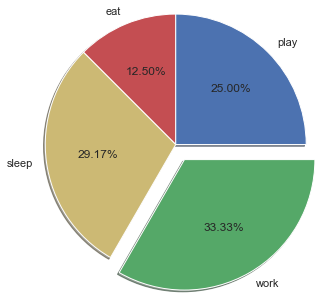

In [47]:
# column명 넣기
activities = ['eat','sleep','work','play']

#값 넣기
slices = [3,7,8,6]

#색깔
colors = ['r','y','g','b']

#파이차트 그리기
plt.pie(slices, labels=activities, colors=colors,
       startangle=90, shadow=True,
       explode=(0,0,0.2,0), radius=1.5,
       autopct = '%1.2f%%')# 부채꼴에 표시될 숫자의 형식 소수점 한자리

#plt.legend()
plt.show()